# KNN

### What is KNN?

- Supervised Algorithm
- Makes predictions based on how close a new data point is to known data points.
- Lazy
- Sensitive to scaling

Link: [KNN Diagram](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

#### Pros:
1. Simple
2. Robust to noise
3. Effective with large datasets
4. Performs calculations "just in time"
5. Data is easy to keep up to date to keep predictions accurate

#### Cons:
1. Need to determine how many neighbors is optimal
2. Computation cost is high (has to calculate every single distance to every feature)
3. Euclidean volume increases exponentially as number of features increases (curse of dimensionality)

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

# Data modeling
from model import map_setosa_knn, train_validate_test_split

## Acquire (Iris Dataset)

In [2]:
# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

## Prepare/Preprocessing

In [5]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['species', 'petal_length', 'petal_width'])
y_train = train.species

X_validate = validate.drop(columns=['species', 'petal_length', 'petal_width'])
y_validate = validate.species

X_test = test.drop(columns=['species', 'petal_length', 'petal_width'])
y_test = test.species

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

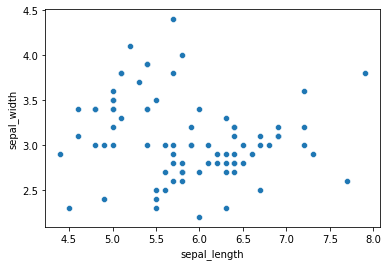

In [6]:
sns.scatterplot(data=X_train, x='sepal_length', y='sepal_width')

## Train Model

#### Create KNN Object

In [7]:
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

#### Fit the Model to the Training Data

In [8]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Make Predictions

In [9]:
y_pred = knn1.predict(X_train)
y_pred[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [10]:
y_train[:5]

80     versicolor
37         setosa
134     virginica
96     versicolor
19         setosa
Name: species, dtype: object

#### Estimate Probability

In [11]:
y_pred_proba = knn1.predict_proba(X_train)
y_pred_proba[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Evaluate Model

**Note**: This next visualization is from a custom module (model.py). It has significant limitations and should not be used outside of this tutorial. Unfortunately, there is not an easy way to visualize KNN models. Many KNN models will be impossible to visually represent on a 2-D or 3-D plane anyways, due to the number of features. 

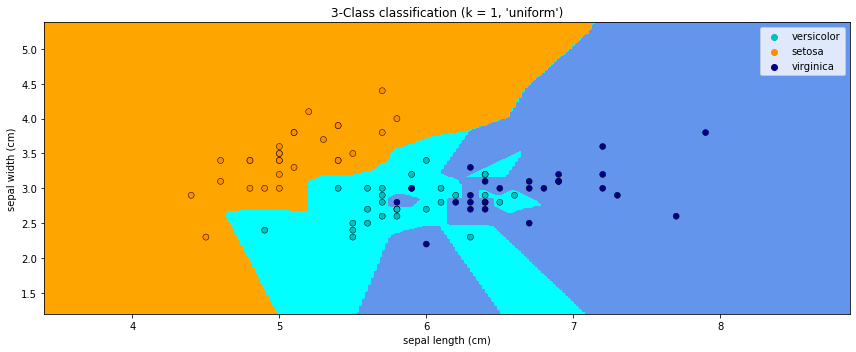

In [12]:
map_setosa_knn(X_train, y_train, knn1)

#### Compute the Accuracy

In [13]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.95


#### Create a Confusion Matrix

In [14]:
print(confusion_matrix(y_train, y_pred))

[[28  0  0]
 [ 0 27  1]
 [ 0  3 25]]


In [15]:
pd.crosstab(y_train, y_pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,28,0,0
versicolor,0,27,1
virginica,0,3,25


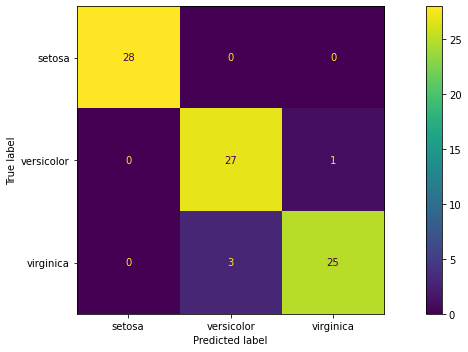

In [16]:
plot_confusion_matrix(knn1, X_train, y_train)

#### Create a Classification Report

In [17]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel() # Why is this line of code failing?

ValueError: too many values to unpack (expected 4)

In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      0.96      0.93        28
   virginica       0.96      0.89      0.93        28

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



## Lets Do it Again

In [19]:
# Create KNN Object
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit object to training data
knn5.fit(X_train, y_train)

# Make predictions on training data
y_pred5 = knn5.predict(X_train)

How does the boundary map for **k = 5** compared to **k = 1**?

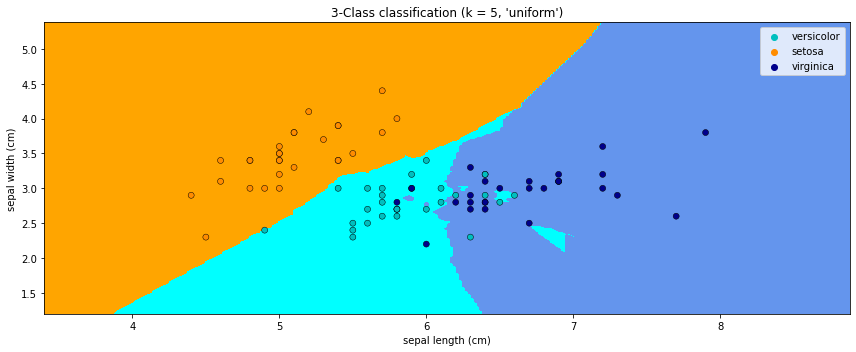

In [20]:
map_setosa_knn(X_train, y_train, knn5)

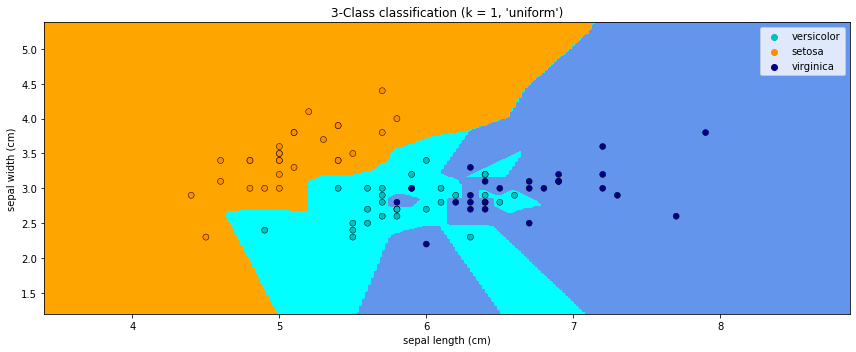

In [21]:
map_setosa_knn(X_train, y_train, knn1)

In [22]:
# Evaluate the new model

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn5.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.87


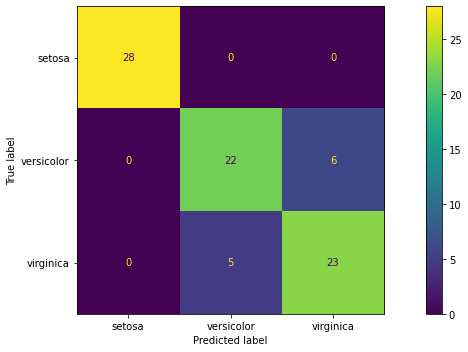

In [23]:
plot_confusion_matrix(knn5, X_train, y_train)

It seems like our `knn1` model is better than our `knn5` model. But lets see how they perform on out-of-sample data

In [24]:
print('Accuracy of KNN (k=1) classifier on validate set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))

print('Accuracy of KNN (k=5) classifier on validate set: {:.2f}'
     .format(knn5.score(X_validate, y_validate)))

Accuracy of KNN (k=1) classifier on validate set: 0.78
Accuracy of KNN (k=5) classifier on validate set: 0.81


Our second model is more performant on out of sample data. Furthermore, it has less of a drop between train score and validate score.

## Finding the Best value for k

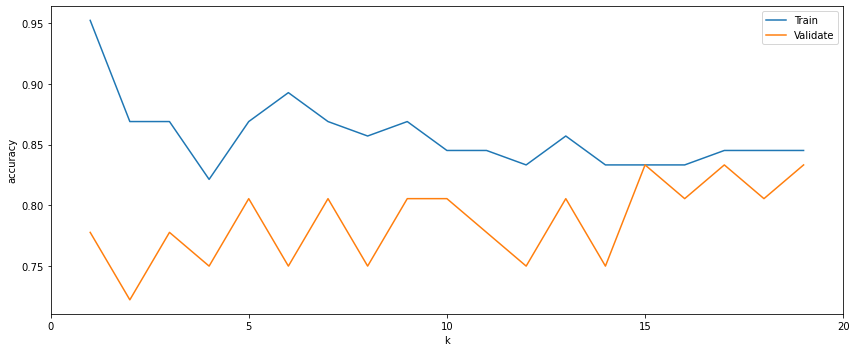

In [26]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

## Next Steps
- We only used sepal_length and sepal_width. We can try new models with different and/or additional features. 


- There are other hyperparameters we can tweak
    - 'weights': Uniform is the default (all points are treated equally), but we can switch to a 'distance' approach where nearer neighbors are given more weight in the voting process
    - 'algorithm': Large datasets use a sampling algorithm to save on computational cost. We can try different samplers. 
    - 'metric': There is more than one way to measure distance


- There are very similar models that we can try (RadiusNeighborsClassifier)

# Exercises

Continue working in your `model.ipynb` file with the titanic dataset.

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

5. Run through setps 2-4 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

-------

Once you have completed work on the titanic dataset, try building some knn models with your telco data.